# **Notebook for Microskill 5: Biomedical AI Saftey

#### DataSet: Women in Data Science, 91,713 encounters 
#### Microskill: Generate a Model Card
#### Date: 2025-02-01
#### Author: Jeremy Balch

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tableone import TableOne
import warnings
warnings.filterwarnings("ignore")


### Load Train Data

In [3]:
data = pd.read_csv('/Users/jeremy/Desktop/ISICEM/widsdatathon2020/data_clean.csv')
# data = pd.read_csv('../training_v2.csv')

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,patient_id,age,elective_surgery,bmi,apache_4a_hospital_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,...,age_cat_70-79,age_cat_80-89,bmi_cat_10-14,bmi_cat_15-19,bmi_cat_20-24,bmi_cat_25-29,bmi_cat_30-34,bmi_cat_35-39,bmi_cat_40-44,bmi_cat_>45
0,0,25312,68.0,0,22.73,0.10,0.0,0.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,1,59342,77.0,0,27.42,0.47,0.0,0.0,1.0,0.0,...,True,False,False,False,False,True,False,False,False,False
2,2,50777,25.0,0,31.95,0.00,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
3,3,46918,81.0,1,22.64,0.04,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,False,False,False
4,5,74489,67.0,0,27.56,0.05,0.0,0.0,1.0,0.0,...,False,False,False,False,False,True,False,False,False,False


In [12]:
data.columns.tolist()

['Unnamed: 0',
 'patient_id',
 'age',
 'elective_surgery',
 'bmi',
 'apache_4a_hospital_death_prob',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'readmission_status',
 'hospital_death',
 'gender_F',
 'gender_M',
 'ethnicity_African American',
 'ethnicity_Asian',
 'ethnicity_Caucasian',
 'ethnicity_Hispanic',
 'ethnicity_Native American',
 'ethnicity_Other/Unknown',
 'age_cat_0-9',
 'age_cat_10-19',
 'age_cat_20-29',
 'age_cat_30-39',
 'age_cat_40-49',
 'age_cat_50-59',
 'age_cat_60-69',
 'age_cat_70-79',
 'age_cat_80-89',
 'bmi_cat_10-14',
 'bmi_cat_15-19',
 'bmi_cat_20-24',
 'bmi_cat_25-29',
 'bmi_cat_30-34',
 'bmi_cat_35-39',
 'bmi_cat_40-44',
 'bmi_cat_>45']

In [9]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = data.drop('hospital_death', axis=1)  # Features
y = data['hospital_death']               # Target variable

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62060, 40)
X_test shape: (15515, 40)
y_train shape: (62060,)
y_test shape: (15515,)


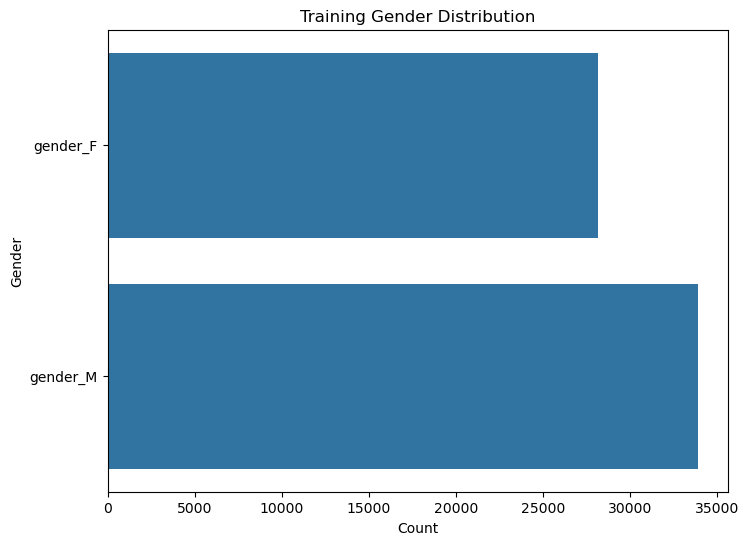

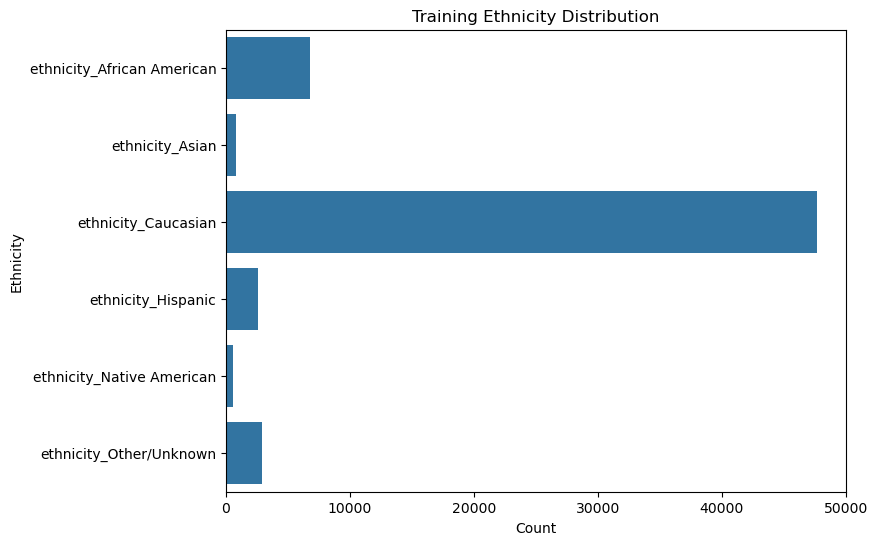

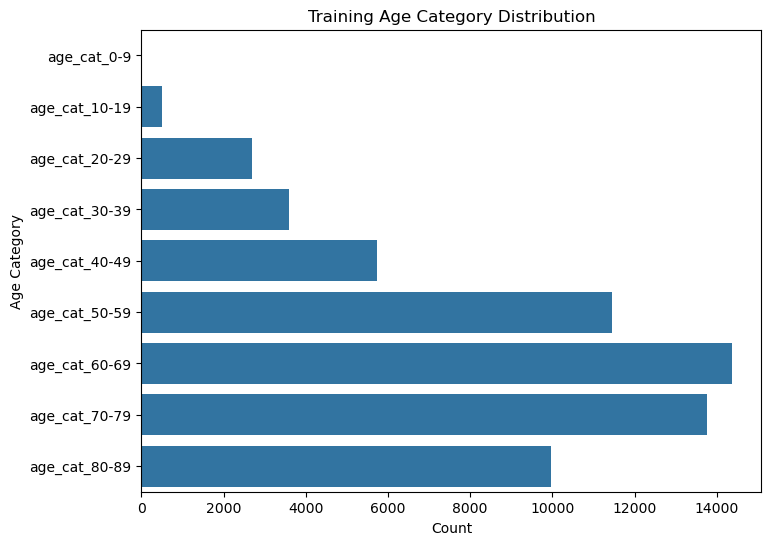

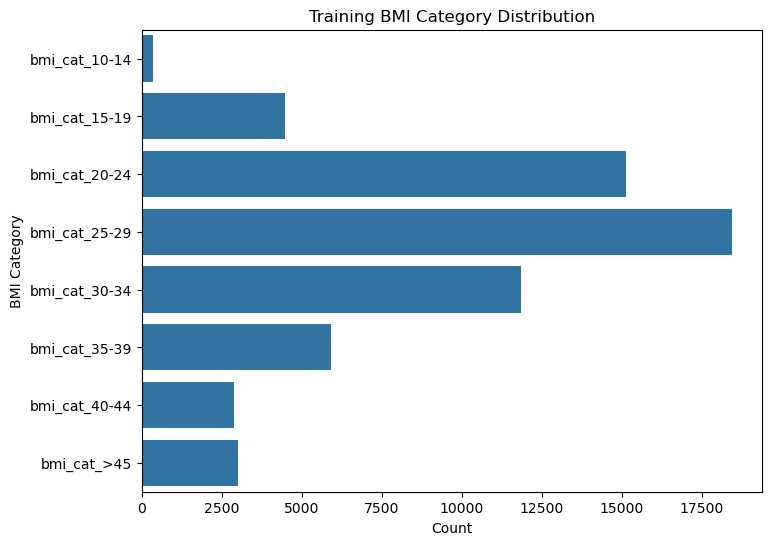

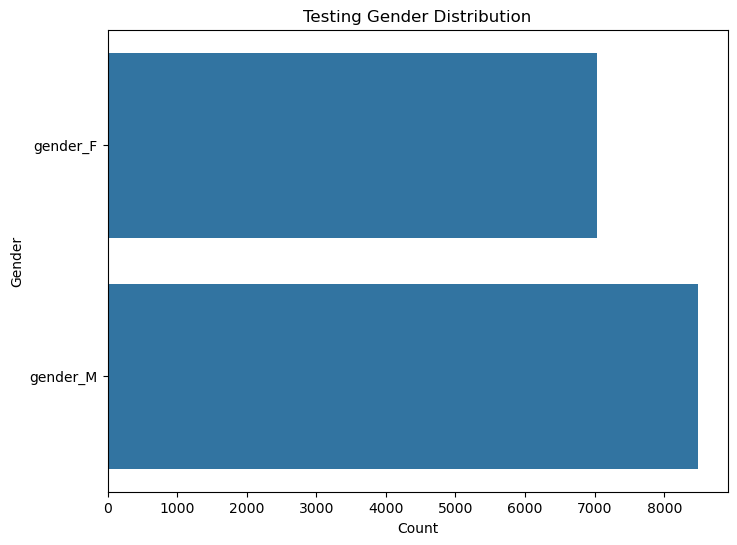

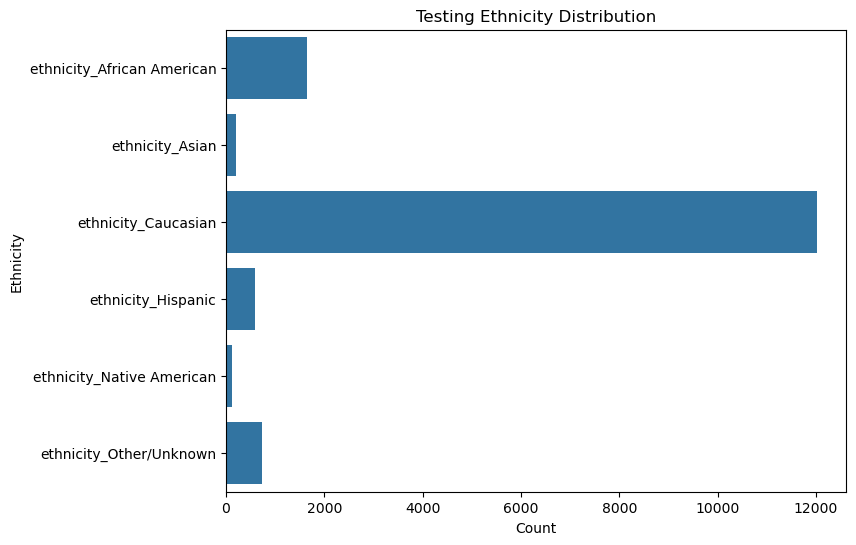

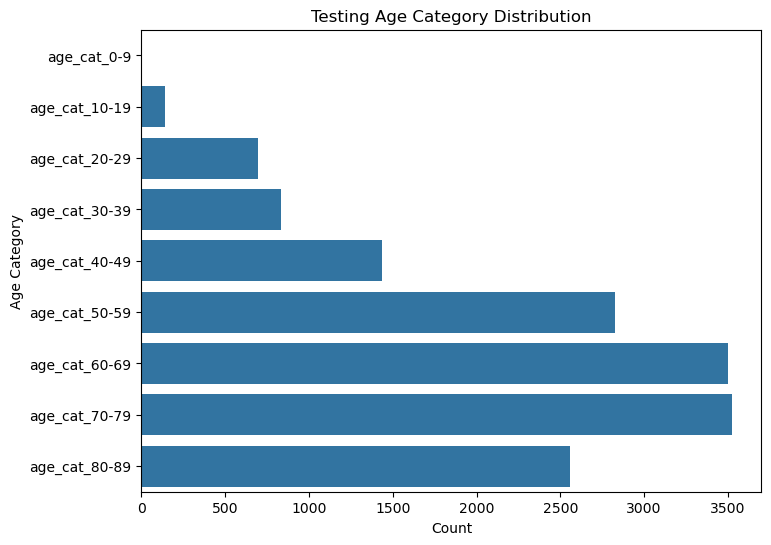

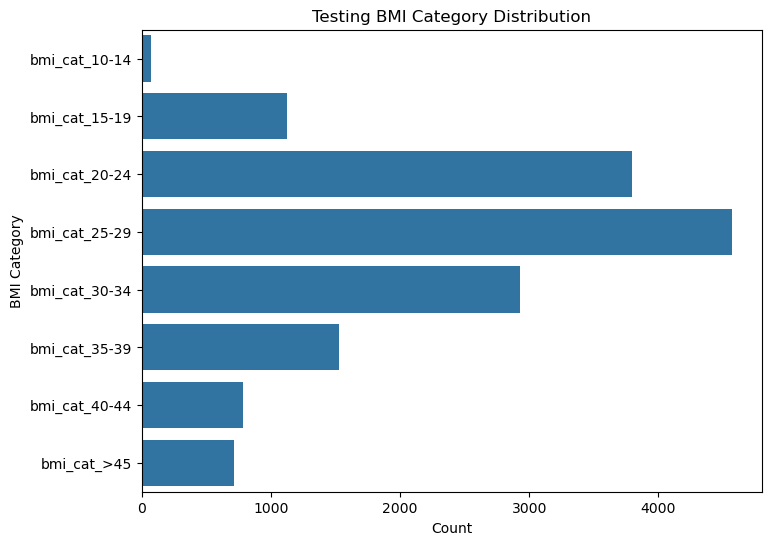

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example category groupings (adjust if needed)
gender_cols = ['gender_F', 'gender_M']
ethnicity_cols = [
    'ethnicity_African American',
    'ethnicity_Asian',
    'ethnicity_Caucasian',
    'ethnicity_Hispanic',
    'ethnicity_Native American',
    'ethnicity_Other/Unknown'
]
age_cols = [
    'age_cat_0-9',
    'age_cat_10-19',
    'age_cat_20-29',
    'age_cat_30-39',
    'age_cat_40-49',
    'age_cat_50-59',
    'age_cat_60-69',
    'age_cat_70-79',
    'age_cat_80-89'
]
bmi_cols = [
    'bmi_cat_10-14',
    'bmi_cat_15-19',
    'bmi_cat_20-24',
    'bmi_cat_25-29',
    'bmi_cat_30-34',
    'bmi_cat_35-39',
    'bmi_cat_40-44',
    'bmi_cat_>45'
]

save_dir = "/Users/jeremy/UFL Dropbox/Jeremy Balch/GitHub/UF-biasathon-workshop2025/figures"

# ------------------ TRAINING DATA ------------------
# 1) Training: Gender distribution (horizontal bar chart)
train_gender_counts = X_train[gender_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=train_gender_counts.values, y=train_gender_counts.index, orient='h')
plt.title("Training Gender Distribution")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.savefig(f"{save_dir}/train_gender_distribution.png")
plt.show()

# 2) Training: Ethnicity distribution (horizontal bar chart)
train_ethnicity_counts = X_train[ethnicity_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=train_ethnicity_counts.values, y=train_ethnicity_counts.index, orient='h')
plt.title("Training Ethnicity Distribution")
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.savefig(f"{save_dir}/train_ethnicity_distribution.png")
plt.show()

# 3) Training: Age category distribution (horizontal bar chart)
train_age_counts = X_train[age_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=train_age_counts.values, y=train_age_counts.index, orient='h')
plt.title("Training Age Category Distribution")
plt.xlabel("Count")
plt.ylabel("Age Category")
plt.savefig(f"{save_dir}/train_age_category_distribution.png")
plt.show()

# 4) Training: BMI category distribution (horizontal bar chart)
train_bmi_counts = X_train[bmi_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=train_bmi_counts.values, y=train_bmi_counts.index, orient='h')
plt.title("Training BMI Category Distribution")
plt.xlabel("Count")
plt.ylabel("BMI Category")
plt.savefig(f"{save_dir}/train_bmi_category_distribution.png")
plt.show()

# ------------------ TESTING DATA ------------------
# 5) Testing: Gender distribution (horizontal bar chart)
test_gender_counts = X_test[gender_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=test_gender_counts.values, y=test_gender_counts.index, orient='h')
plt.title("Testing Gender Distribution")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.savefig(f"{save_dir}/test_gender_distribution.png")
plt.show()

# 6) Testing: Ethnicity distribution (horizontal bar chart)
test_ethnicity_counts = X_test[ethnicity_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=test_ethnicity_counts.values, y=test_ethnicity_counts.index, orient='h')
plt.title("Testing Ethnicity Distribution")
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.savefig(f"{save_dir}/test_ethnicity_distribution.png")
plt.show()

# 7) Testing: Age category distribution (horizontal bar chart)
test_age_counts = X_test[age_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=test_age_counts.values, y=test_age_counts.index, orient='h')
plt.title("Testing Age Category Distribution")
plt.xlabel("Count")
plt.ylabel("Age Category")
plt.savefig(f"{save_dir}/test_age_category_distribution.png")
plt.show()

# 8) Testing: BMI category distribution (horizontal bar chart)
test_bmi_counts = X_test[bmi_cols].sum()
plt.figure(figsize=(8,6))
sns.barplot(x=test_bmi_counts.values, y=test_bmi_counts.index, orient='h')
plt.title("Testing BMI Category Distribution")
plt.xlabel("Count")
plt.ylabel("BMI Category")
plt.savefig(f"{save_dir}/test_bmi_category_distribution.png")
plt.show()

In [17]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate AUROC
from sklearn.metrics import roc_auc_score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"AUROC: {auroc:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.92
AUROC: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14214
           1       0.59      0.22      0.31      1301

    accuracy                           0.92     15515
   macro avg       0.76      0.60      0.64     15515
weighted avg       0.90      0.92      0.90     15515

Confusion Matrix:
[[14017   197]
 [ 1021   280]]


In [20]:
# ...
# [An existing cell above this point has code that loads and prepares 'df' DataFrame]
# ...

# New cell to calculate and plot AUROC by race and gender
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Calculate AUROC by Race
race_values = data["race"].dropna().unique()
race_aucs = {}
for r in race_values:
    mask = (data["race"] == r)
    # Replace 'hospital_death' and 'predicted_prob' below with your actual ground-truth & prediction columns
    y_true = data.loc[mask, "hospital_death"]
    y_score = data.loc[mask, "predicted_prob"]
    race_aucs[r] = roc_auc_score(y_true, y_score)

race_auc_df = pd.DataFrame([
    {"Race": k, "AUROC": v} for k, v in race_aucs.items()
])
plt.figure(figsize=(6, 4))
sns.barplot(data=race_auc_df, y="Race", x="AUROC", orient="h")
plt.title("AUROC by Race")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Calculate AUROC by Gender
gender_values = df["gender"].dropna().unique()
gender_aucs = {}
for g in gender_values:
    mask = (df["gender"] == g)
    # Again, replace 'hospital_death' and 'predicted_prob' if needed
    y_true = df.loc[mask, "hospital_death"]
    y_score = df.loc[mask, "predicted_prob"]
    gender_aucs[g] = roc_auc_score(y_true, y_score)

gender_auc_df = pd.DataFrame([
    {"Gender": k, "AUROC": v} for k, v in gender_aucs.items()
])
plt.figure(figsize=(6, 4))
sns.barplot(data=gender_auc_df, y="Gender", x="AUROC", orient="h")
plt.title("AUROC by Gender")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# ...
# [Any subsequent cells remain unchanged]

KeyError: 'race'